# Principal Component Analysis

The purpose of this notebook is to give an orientation of the salient features of PCA and how to access them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)   # pandas: only print out 20 rows rather than the default 60.
np.set_printoptions(precision=2, suppress=True)  # numpy: only print the first 2 decimal places.

### Load and view the data
We will use the bikes dataset we've discussed in class. Load in the data with the following command, inspect the columns, and visualise using a pairplot.

In [8]:
X = pd.read_csv("data/bikes.csv")
X

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


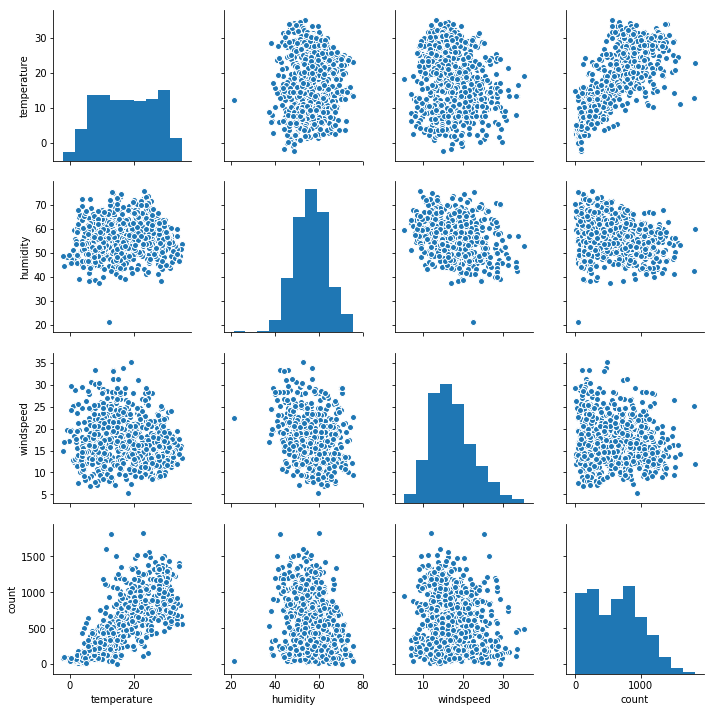

In [9]:
sns.pairplot(X)    #pairplot is good but if you have too many columns it is not so good, eg more than 10 columns

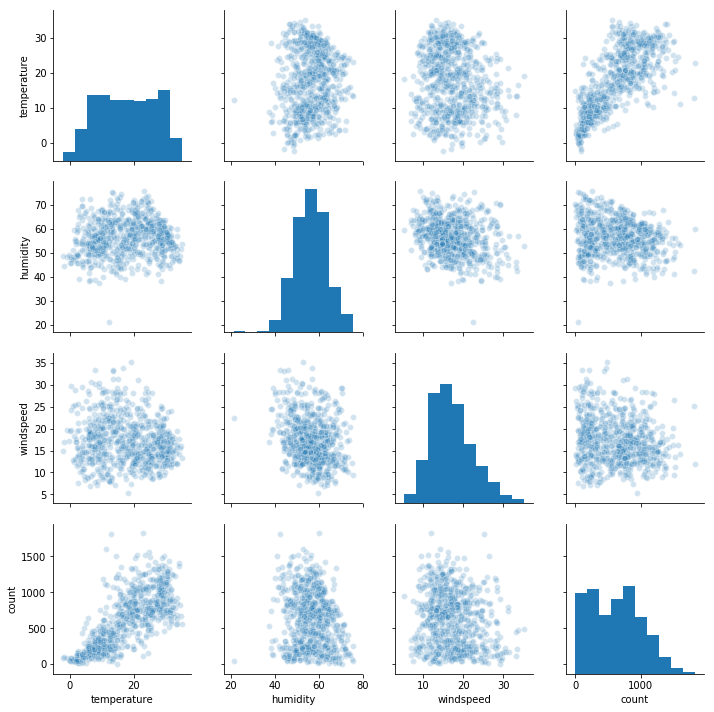

In [15]:
sns.pairplot(X, plot_kws=dict(alpha = 0.2))   #gives us an idea of the density of our plots

### Scikit-learn's PCA
The sklearn PCA model follows the same workflow as before:

* Instantiate the object
* Fit the object using the `.fit(...)` command.

### Fitting the model
Have a look at the docs to see what Parameters are available to you. Crucially,

* Which transformations did we say are needed before performing PCA? the transformation we talked about were removing the mean and standardising the variants.
* Does sklearn's PCA do these for you?

Before fitting the model, perform/consider the following transformations of the raw data:
* Remove the date column. [Bonus question:] Is there some transformation that would make sense to keep in here?
* Should you make each column unit variance? (That is, `X.std(0) == zeros(d)`?)

So, ensuring that the data matrix is suitably transformed (if neccessary), instantiate a PCA object. Make sure you do not specify the number of components: we want to return all principal components. Then fit the model to your transformed data.

In [17]:
from sklearn.decomposition import PCA

In [19]:
X_tform = X.drop('date', axis=1)
X_tform /= X_tform.std(0)

In [20]:
pca = PCA()

In [21]:
pca.fit(X_tform)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[-0.68, -0.04,  0.27, -0.68],
       [ 0.06, -0.76,  0.61,  0.23],
       [ 0.3 ,  0.6 ,  0.74, -0.04],
       [-0.67,  0.25,  0.11,  0.7 ]])

### Investigating the fitted model
If you have standardised your columns, your principal component matrix $W$ should look as follows:

```
╔═══════╦═══════╦══════╦═══════╗
║ -0.68 ║ -0.04 ║ 0.27 ║ -0.68 ║
╠═══════╬═══════╬══════╬═══════╣
║  0.06 ║ -0.76 ║ 0.61 ║  0.23 ║
╠═══════╬═══════╬══════╬═══════╣
║  0.30 ║  0.60 ║ 0.74 ║ -0.04 ║
╠═══════╬═══════╬══════╬═══════╣
║ -0.67 ║  0.25 ║ 0.11 ║  0.70 ║
╚═══════╩═══════╩══════╩═══════╝
```
Obtaining the values of $W$ and $A$ for your fitted model is easy.

To retrieve the matrix $W$ calculated by the model use:
* `.components_`

To retrieve the new co-ordinates, the matrix $A$, use:
* `.fit_transform([your data])`


In [24]:
W = pca.components_
A = pca.fit_transform(X_tform)

### Interpreting PCA

* What does the first row of the matrix $W$ mean?
* Is it significant that most of the values are negative?

In [ ]:
# The first row is the first principal component, i.e. the direction of greatest variance 
# through the dataset. Recall that the data in our case was standardised such that all 
# columns have unit variance. If one were able to plot the data in 4D space, it is this 
# direction that would exhibit the largest 'stretch'.
#
# The direction itself is indicative that temperature and bike count correspond to the most
# substantial correlation and variation in the dataset, and that this relationship is worth
# exploring.
#
# The sign of the direction is arbitrary, i.e. we can multiply all elements by -1, and the
# vector still describes the same subspace (it would simply flip the space over 180 degrees).
# However, it is significant that the 'windspeed' factor is of the opposite sign, meaning
# that this relationship is even stronger if including windspeed, but if we travel along
# *increasing* temperature, then this relationship involves *reducing* windspeed.
#
# If anything, this unsupervised analysis is indicative that performing regression on
# Bike Count is a sensible idea.
#


### Explained Variance
Calculate the covariance of the new coordinates constructed by PCA.

* What is the correlation between each dimension of this new basis?
* How much variation is contained within each subspace?
* Now find the "explained variance" calculated by sklearn. This is the attribute: `.explained_variance_`.
* What is the relationship here?
* Calculate the cumulative `.explained_variance_ratio_` (hint: use `np.cumsum`). What do you think this view might be useful for?



In [26]:
np.corrcoef(A.T)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.],
       [ 0., -0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [27]:
np.var(A, axis=0)

array([1.8 , 1.24, 0.75, 0.21])

In [28]:
pca.explained_variance_    #explained variance is how much variance exists in each principal direction

array([1.8 , 1.24, 0.75, 0.21])

In [29]:
pca.explained_variance_ratio_  #The percentage of variance of the original data cloud can be explained by use of each 
                                #individual components

array([0.45, 0.31, 0.19, 0.05])

In [30]:
pca.explained_variance_ / sum(pca.explained_variance_)

array([0.45, 0.31, 0.19, 0.05])

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45, 0.76, 0.95, 1.  ])

### Visualise the subspaces
Plot the principal 2D subspace, i.e. the 2D subspace that captures the most variation.
* How much variation of the original dataset has this captured?
* To what extent can we trust this plot as a valid representation of our data?
* By providing an interpretation of the second principal component, explain what this plot indicates about the original dataset.

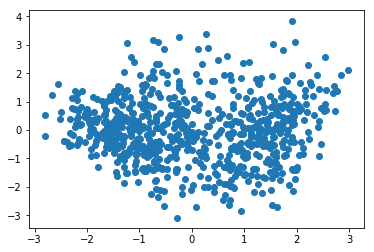

In [32]:
plt.scatter(A[:,0], A[:,1]) #plot the first and second columns of A
# PC2 suggests that windspeed and humidity are anti-correlated in the original dataset.
# It also suggests that bike rental sales are also correlated with an increase of wind
# provided humidity decreases far enough. The fact that the former two are anti-correlated
# probably has more to do with the time of year than anything, and this might indicate
# the correlation with bike sales is not causal.
#
# There's not too much to say from the plot of the 2D subspace. At a push you can talk
# about the absence of datapoints in the negative quadrant, but by-and-large the
# data are well-spread within this subspace.
#
# The most notable feature is the possible presence of two clusters corresponding to
# low temperature and low sales, and high temperature and high sales. Again this may
# be more due to time of year than anything else.


In [39]:
#com add your code here to load the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/companies_data.dat", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


## Cleaning and scaling the data

Even though this is not the key aim of this notebook, you still need to clean up the data (good practice!). In this case, it contains a few question marks that need to be removed. 

* using `data.replace`, replace the `?` by `np.NaN`
* make sure the data types are right (check `data.dtypes`), if not apply `pd.to_numeric`
* drop the missing values with `dropna()`

Then

* import the `StandardScaler` from `sklearn` and apply it on the data, check that every feature is now centered and has unit variance

## [Bonus] Now have a go on a larger dataset
Sklearn houses a bunch of classic data science datasets. Let's use the Boston Housing data. Have a look at [https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) for more details. This is a much higher dimensinoal dataset, and can only really be explored by looking at various subspaces. Have a go at using PCA to learn about its features.


In [5]:
from sklearn import datasets

In [6]:
x, _ = datasets.load_boston(return_X_y=True)

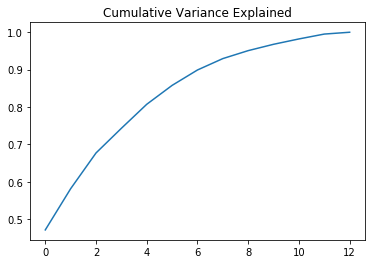

In [37]:
pca = PCA().fit(x / x.std(0))
W = pca.components_
A = pca.fit_transform(x / x.std(0))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_title("Cumulative Variance Explained");

[[ 0.25 -0.26  0.35  0.01  0.34 -0.19  0.31 -0.32  0.32  0.34  0.2  -0.2
   0.31]
 [-0.32 -0.32  0.11  0.45  0.22  0.15  0.31 -0.35 -0.27 -0.24 -0.31  0.24
  -0.07]
 [ 0.25  0.3  -0.02  0.29  0.12  0.59 -0.02 -0.05  0.29  0.22 -0.32 -0.3
  -0.27]
 [ 0.06  0.13  0.02  0.82 -0.13 -0.28 -0.18  0.22  0.13  0.1   0.28  0.17
   0.07]
 [ 0.08  0.32 -0.01  0.09  0.14 -0.42  0.02  0.1  -0.2  -0.13 -0.58 -0.35
   0.39]
 [-0.22 -0.32 -0.08  0.17 -0.15  0.06 -0.07  0.02 -0.14 -0.19  0.27 -0.8
  -0.05]
 [ 0.78 -0.27 -0.34  0.07 -0.2   0.06  0.12 -0.1  -0.14 -0.31  0.    0.07
   0.09]
 [ 0.15 -0.4   0.17 -0.02  0.08 -0.33 -0.6  -0.12  0.08  0.08 -0.32 -0.
  -0.42]
 [ 0.26  0.36  0.64 -0.01 -0.02  0.05 -0.07 -0.15 -0.47 -0.18  0.25 -0.04
  -0.2 ]
 [ 0.02  0.27 -0.36 -0.01  0.23 -0.43  0.36 -0.17  0.02 -0.04  0.15 -0.1
  -0.6 ]
 [-0.11  0.26 -0.3   0.01  0.11  0.05 -0.46 -0.7   0.04 -0.1   0.17  0.02
   0.27]
 [ 0.09 -0.07 -0.11 -0.    0.8   0.15 -0.21  0.39 -0.11 -0.22  0.21  0.04
   0.06]
 [ 0.05 -0

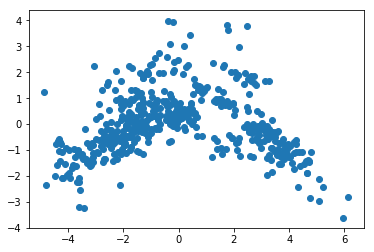

In [38]:
print(W)
plt.scatter(A[:,0], A[:,1]);
# The PCs here are quite dense, in that a lot of dimensions in the original 
# dataset have a reasonable-sized contribution in terms of coefficients.
# Using the Toronto webpage, have a look to see if these make some kind
# of sense.